In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# DATA PREPROCESSING

In [6]:
# loading the data
df_test = pd.read_csv("customer_churn_dataset-testing-master.csv")
df_train = pd.read_csv("customer_churn_dataset-training-master.csv")
df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598.0,9.0,1.0
1,2,41,Female,28,28,7,13,Standard,Monthly,584.0,20.0,0.0
2,3,47,Male,27,10,2,29,Premium,Annual,757.0,21.0,0.0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232.0,18.0,0.0
4,5,53,Female,58,24,9,2,Standard,Annual,533.0,18.0,0.0


In [ ]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
print('test data: ', df_test.shape)
print("train data: ", df_train.shape)

test data:  (64374, 12)
train data:  (260706, 12)


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260706 entries, 0 to 260705
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         260705 non-null  float64
 1   Age                260705 non-null  float64
 2   Gender             260705 non-null  object 
 3   Tenure             260705 non-null  float64
 4   Usage Frequency    260705 non-null  float64
 5   Support Calls      260705 non-null  float64
 6   Payment Delay      260705 non-null  float64
 7   Subscription Type  260705 non-null  object 
 8   Contract Length    260705 non-null  object 
 9   Total Spend        260705 non-null  float64
 10  Last Interaction   260704 non-null  float64
 11  Churn              260704 non-null  float64
dtypes: float64(9), object(3)
memory usage: 23.9+ MB
None


In [ ]:
print(df_train.describe())

          CustomerID            Age         Tenure  Usage Frequency  \
count  260705.000000  260705.000000  260705.000000    260705.000000   
mean   133860.380829      41.514862      30.547742        15.489469   
std     77432.872221      13.857569      17.334544         8.667146   
min         2.000000      18.000000       1.000000         1.000000   
25%     66620.000000      30.000000      16.000000         8.000000   
50%    134620.000000      42.000000      31.000000        15.000000   
75%    200339.000000      54.000000      46.000000        23.000000   
max    267819.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  260705.000000  260705.000000  260705.000000     260704.000000   
mean        4.998922      15.006080     549.838999         15.499344   
std         3.166926       8.932092     259.436133          8.656644   
min         0.000000       0.000000     100.000000          1.000000   


In [ ]:
# Checcking for null values
print(df_train.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     2
Churn                2
dtype: int64


In [7]:
# Eliminating Null values
df_train_clean = df_train.dropna()
print(df_train_clean.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# Outliers
# Select numerical columns for outlier detection
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df_train_clean[numerical_columns])

# Define threshold for Z-score (e.g., ±3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [28]:
# Remove outliers from the dataset
df_clean1 = df_train_clean[~outliers.any(axis=1)]
df_clean1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0


In [33]:
df_clean = df_clean1.drop(columns=["CustomerID", "Age", "Gender", "Tenure", "Subscription Type", "Contract Length"], inplace=False)
df_clean.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,14,5,18,932.0,17.0,1.0
1,1,10,8,557.0,6.0,1.0
2,4,6,18,185.0,3.0,1.0
3,21,7,7,396.0,29.0,1.0
4,20,5,8,617.0,20.0,1.0


# Feature engineering and Exploratory Data Analysis

In [34]:
# selecting key variable, Feature engineering, Exploratory Data Analysis for Customer Churn Prediction

key_variables = ["Payment Delay", "Usage Frequency","Last Interaction", "Total Spend", "Support Calls"]


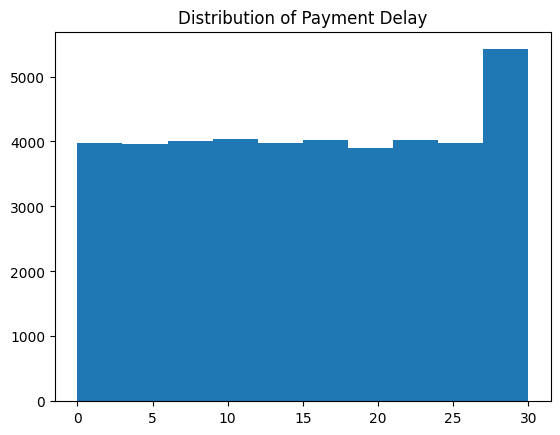

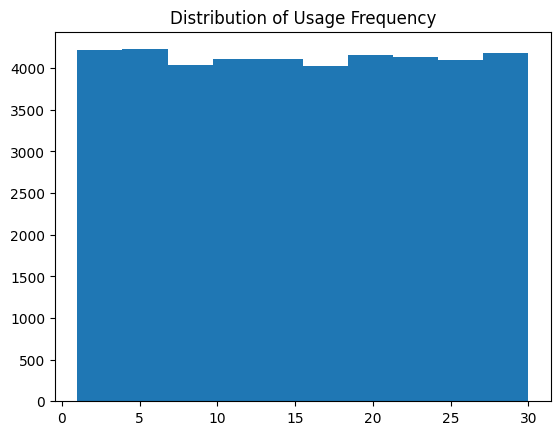

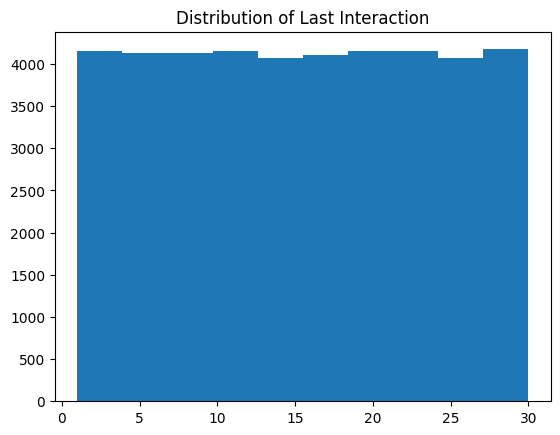

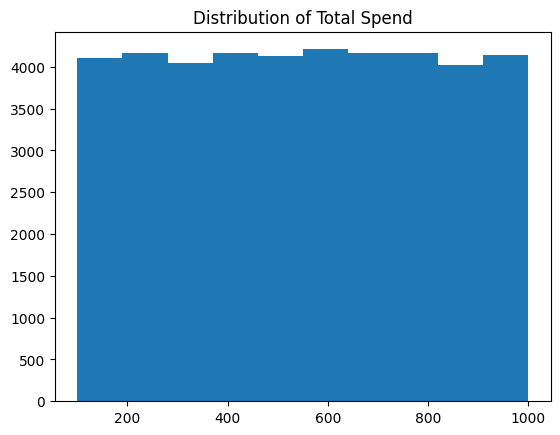

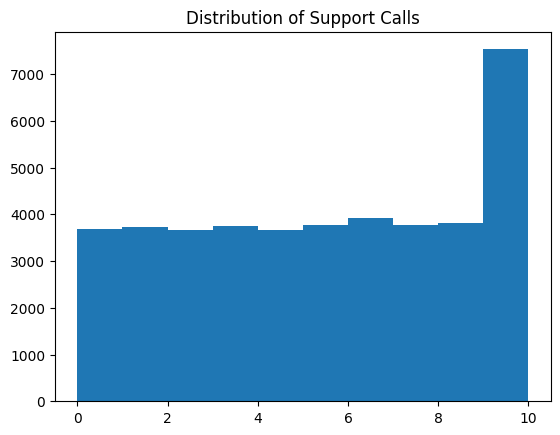

In [35]:
# Visualize each variable
for variable in key_variables:
    plt.hist(df_clean[variable])
    plt.title(f"Distribution of {variable}")
    plt.show()

In [36]:
# Group data by churn
churned = df_clean[df_clean["Churn"] == 1]
not_churned = df_clean[df_clean["Churn"] == 0]


In [37]:
# Compare means of key variables
for variable in key_variables:
    print(f"Mean of {variable} for churned customers: {churned[variable].mean()}")
    print(f"Mean of {variable} for non-churned customers: {not_churned[variable].mean()}")


Mean of Payment Delay for churned customers: 15.201220427149503
Mean of Payment Delay for non-churned customers: 9.933734939759036
Mean of Usage Frequency for churned customers: 15.442854999249738
Mean of Usage Frequency for non-churned customers: 16.2605421686747
Mean of Last Interaction for churned customers: 15.588530985845045
Mean of Last Interaction for non-churned customers: 12.777861445783133
Mean of Total Spend for churned customers: 542.7702445856049
Mean of Total Spend for non-churned customers: 750.7371987951807
Mean of Support Calls for churned customers: 5.1473515730505675
Mean of Support Calls for non-churned customers: 1.5572289156626506


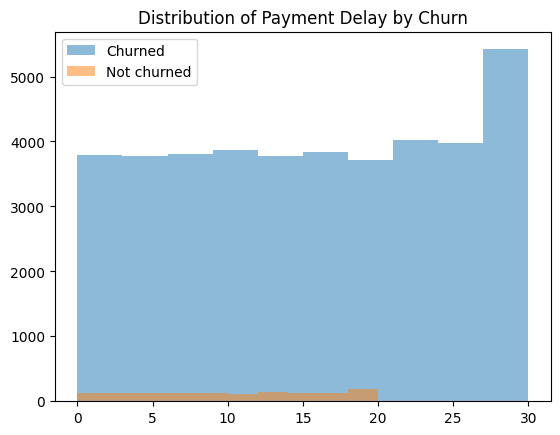

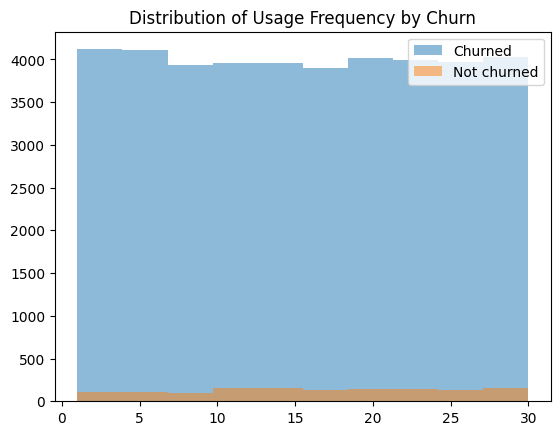

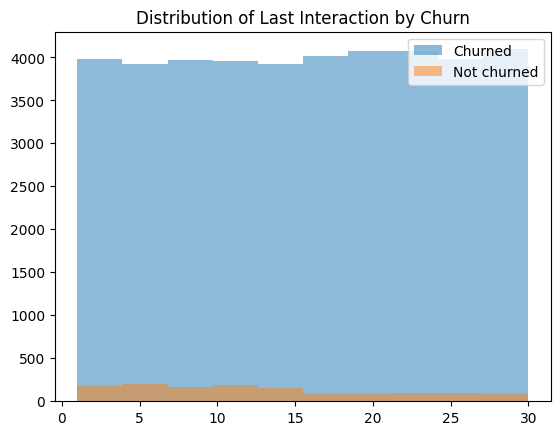

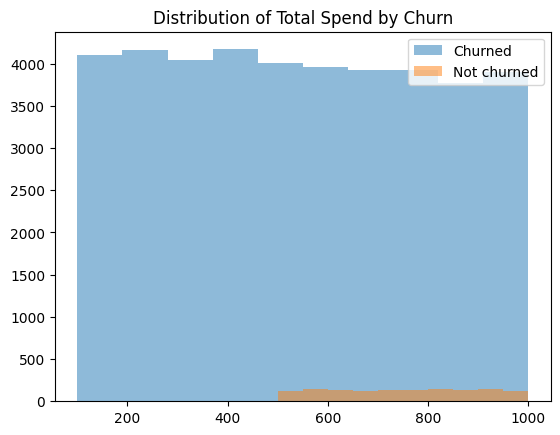

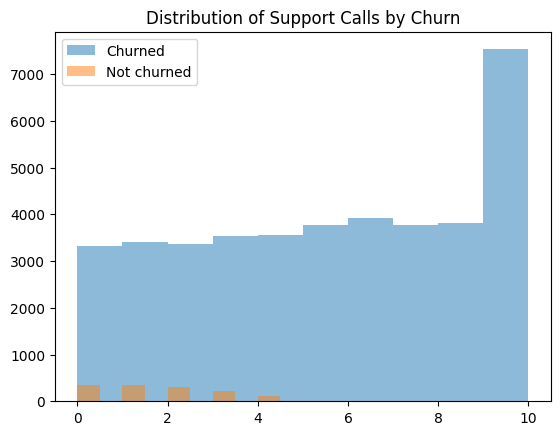

In [38]:
for variable in key_variables:
  plt.hist(churned[variable], alpha=0.5, label="Churned")
  plt.hist(not_churned[variable], alpha=0.5, label="Not churned")
  plt.title(f"Distribution of {variable} by Churn")
  plt.legend()
  plt.show()

In [39]:
# Perform statistical t-tests to compare groups
from scipy.stats import ttest_ind

for variable in key_variables:
    ttest, p_value = ttest_ind(churned[variable], not_churned[variable])
    print(f"T-test for {variable}: p-value = {p_value}")

T-test for Payment Delay: p-value = 4.616126560862576e-99
T-test for Usage Frequency: p-value = 0.0007425405202202904
T-test for Last Interaction: p-value = 2.5437126494829478e-31
T-test for Total Spend: p-value = 7.752975952677421e-184
T-test for Support Calls: p-value = 0.0


The p-values for all five T-tests are very small (less than 0.05), which means that we can reject the null hypothesis that there is no difference between the groups. This suggests that there is a statistically significant difference between the groups for all five variables: **Payment Delay, Usage Frequency, Last Interaction, Total Spend, and Support Calls**

In [40]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

In [41]:
X.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,14,5,18,932.0,17.0
1,1,10,8,557.0,6.0
2,4,6,18,185.0,3.0
3,21,7,7,396.0,29.0
4,20,5,8,617.0,20.0


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print the size of the training and testing sets
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 28919, Testing set size: 12395


# MODEL SELECTION

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define a list of models to experiment with
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_score = 2 * float(precision) * float(recall) / (float(precision) + float(recall))

    # Print the model name and its performance metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print()

Model: LogisticRegression
Accuracy: 0.97
Precision: 0.97
F1 Score: 0.97

Model: DecisionTreeClassifier
Accuracy: 0.95
Precision: 0.97
F1 Score: 0.97

Model: RandomForestClassifier
Accuracy: 0.96
Precision: 0.97
F1 Score: 0.97

Model: GradientBoostingClassifier
Accuracy: 0.97
Precision: 0.97
F1 Score: 0.97

